In [ ]:
# multinomial classification
# => MNIST 예제 이용하여 보완해야 하는 부분들을 알아보아요

# => MNIST는 이미지를 학습하고 prediction하는 예제

# => tensorflow에서 제공하는 MNIST 예제를 이용하여
#    조금 편하게 작업을 해 볼거예요

In [1]:
# 필요한 module import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# data loading
mnist=input_data.read_data_sets('./data/mnist',one_hot=True)
# .gz => unix 계열의 압축 파일

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [16]:
# train_x_data_df=pd.DataFrame(mnist.train.images)
# train_x_data_df.to_csv('./data/mnist_csv/train_x_data.csv', index=False)

# x 데이터의 각 column은(각 픽셀값은) 0과 1사이의 값으로 이미 scale이 되어 있는 상태
# 0과 가까울수록 흰 색을 지칭, 1과 가까울수록 색상이 어두워짐

train_y_data_df=pd.DataFrame(mnist.train.labels)
train_y_data_df.to_csv('./data/mnist_csv/train_y_data.csv', index=False)

In [93]:
# tensorflow로 machine learning
# placeholder
X=tf.placeholder(shape=[None,784], dtype=tf.float32)
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)

# weight & bias
W=tf.Variable(tf.random_normal([784,10]), name='weight')
b=tf.Variable(tf.random_normal([10]), name='bias')

# Hypothesis
logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit)
# logistic => sigmoid
# multinomial => softmax

# cost
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                               labels=Y))

# train
train=tf.train.GradientDescentOptimizer(learning_rate=.1).minimize(cost)

# sessino & initializer
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [96]:
# learning
# 1 epoch: 전체 데이터 한 번 돌음
train_epoch=30
batch_size=100
cnt=0

for step in range(train_epoch):
    # mnist.train.num_examples: 전체 train 개수
    num_of_iter=mnist.train.num_examples//batch_size
    cost_val=0
    
    for i in range(num_of_iter):
        batch_x, batch_y=mnist.train.next_batch(batch_size)
        _, cost_val=sess.run([train, cost],
                             feed_dict={
#                                  X:mnist.train.images,  # df보다 ndarray가 더 편하고 오류↓
#                                  Y:mnist.train.labels
                                 X:batch_x,
                                 Y:batch_y
                             })

    if step % 3==0:
        cnt+=1
        print(f'cost_value{cnt}: {cost_val}')
        
        
# 학습이 종료되었으니 정확도를 측정해야 함
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'\naccuracy: {sess.run(accuracy, feed_dict={X:mnist.train.images,Y:mnist.train.labels})}')

cost_value1: 0.5020177960395813
cost_value2: 0.518491804599762
cost_value3: 0.6773225665092468
cost_value4: 0.1324278563261032
cost_value5: 0.3719263970851898
cost_value6: 0.3421270251274109
cost_value7: 0.4281929135322571
cost_value8: 0.41849812865257263
cost_value9: 0.2653310298919678
cost_value10: 0.25763875246047974

accuracy: 0.916527271270752


Row: 4498
Label: [7]
Predict: [9]


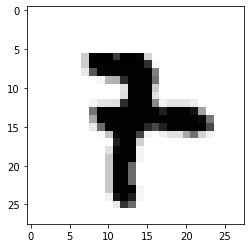

In [283]:
# prediction
# 랜덤으로 하나의 데이터를 추출해서 prediction 진행 후 결과 비교해보아요
r=np.random.randint(0,mnist.test.num_examples)

# 난수가 의미하는 행의 label 값을 먼저 구해보자
label=sess.run(tf.argmax(mnist.test.labels[r:r+1],axis=1))
# mnist.test.labels[r] => 1차원
# mnist.test.labels[r:r+1] => 2차원으로 변경
# axis => 2차원일 경우 사용

print(f'Row: {r}')
print(f'Label: {label}')
print(f'Predict: {sess.run(tf.argmax(H,1), feed_dict={X:mnist.test.images[r:r+1]})}')
# x => 2차원이므로 맞춰줘야 함

# image data
plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys')

